<a href="https://colab.research.google.com/github/NatuO9/MNIST/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%pylab inline

import os
import numpy as np
import pandas as pd

from scipy.misc import imread
from sklearn.metrics import accuracy_score

import tensorflow as tf
import keras

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


# Downloading The MNIST data set

In [0]:
from keras.datasets import mnist

In [0]:
(Images_train, Labels_train), (Images_test, Labels_test) = mnist.load_data()

In [0]:
np.array(Images_test)

In [0]:
Images_test.shape

(10000, 28, 28)

In [0]:
Images_train.shape

(60000, 28, 28)

In [0]:
Labels_train.shape

(60000,)

In [0]:
Labels_test.shape

(10000,)

In [0]:
from google.colab import drive
import os

In [0]:

drive.mount('/content/drive')

8


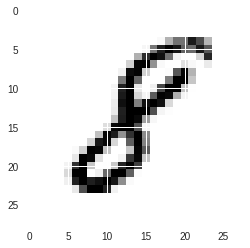

In [0]:
image_index = 7777 # You may select anything up to 60,000

print(Labels_train[image_index]) # The label is 8

plt.imshow(Images_train[image_index], cmap='Greys')

# Reshaping and Normalizing the Images

In [0]:
# Reshaping the array to 4-dims so that it can work with the Keras API

Images_train = Images_train.reshape(Images_train.shape[0], 28, 28, 1)

Images_test = Images_test.reshape(Images_test.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division

Images_train = Images_train.astype('float32')

Images_test = Images_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.

Images_train /= 255

Images_test /= 255

print('Images_train shape:', Images_train.shape)

print('Number of images in Images_train', Images_train.shape[0])

print('Number of images in Images_test', Images_test.shape[0])

Images_train shape: (60000, 28, 28, 1)
Number of images in Images_train 60000
Number of images in Images_test 10000


# Building the Convolutional Neural Network

In [0]:
# Importing the required Keras modules containing model and layers

from keras.models import Sequential

from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Creating a Sequential Model and adding the layers

model = Sequential()

model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Flattening the 2D arrays for fully connected layers

model.add(Dense(128, activation=tf.nn.relu))

model.add(Dropout(0.2))

model.add(Dense(10,activation=tf.nn.softmax))

# Compiling and Fitting the Model


In [0]:
model.compile(optimizer='adam', 

              loss='sparse_categorical_crossentropy', 

              metrics=['accuracy'])

model.fit(x=Images_train,y=Labels_train, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 57s 952us/step - loss: 0.2146 - acc: 0.9356
Epoch 2/10
60000/60000 [==============================] - 56s 936us/step - loss: 0.0872 - acc: 0.9737
Epoch 3/10
60000/60000 [==============================] - 56s 940us/step - loss: 0.0609 - acc: 0.9810
Epoch 4/10
60000/60000 [==============================] - 54s 897us/step - loss: 0.0461 - acc: 0.9855
Epoch 5/10
60000/60000 [==============================] - 55s 918us/step - loss: 0.0369 - acc: 0.9881
Epoch 6/10
60000/60000 [==============================] - 55s 913us/step - loss: 0.0285 - acc: 0.9902
Epoch 7/10
60000/60000 [==============================] - 55s 909us/step - loss: 0.0260 - acc: 0.9913
Epoch 8/10
60000/60000 [==============================] - 54s 904us/step - loss: 0.0227 - acc: 0.9927
Epoch 9/10
60000/60000 [==============================] - 55s 916us/step - loss: 0.0183 - acc: 0.9934
Epoch 10/10
60000/60000 [=========

# Evaluating The Model

In [0]:


model.evaluate(Images_test, Labels_test)

10000/10000 [==============================] - 2s 221us/step


[0.058502479961315475, 0.9847]

Prediction is:   9 / Actual value is:  9 

Prediction is:   1 / Actual value is:  1 

Prediction is:   8 / Actual value is:  8 

Prediction is:   4 / Actual value is:  4 

Prediction is:   1 / Actual value is:  1 

Prediction is:   1 / Actual value is:  1 

Prediction is:   2 / Actual value is:  2 

Prediction is:   7 / Actual value is:  7 

Prediction is:   9 / Actual value is:  9 

Prediction is:   8 / Actual value is:  8 



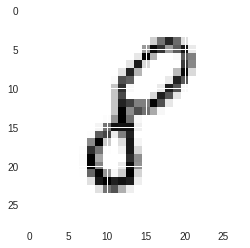

In [0]:
import random
for i in range(10): 
  x = random.randint(1,10000)
  image_index = x

  plt.imshow(Images_test[image_index].reshape(28, 28),cmap='Greys')

  pred = model.predict(Images_test[image_index].reshape(1, 28, 28, 1))

  print("Prediction is:  ", pred.argmax(),"/ Actual value is: ", Labels_test[image_index], "\n")